In [1]:
# Importing necessary python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the CSV file
df = pd.read_csv("firsttry.csv")

In [3]:
# Displaying the dataframe
df

,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7
...,...,...,...,...,...,...
9994,11/13/2021 7:00,0.0,11.8,76.5,39.9,24
9995,11/13/2021 8:00,0.0,13.8,63.3,42.9,22
9996,11/13/2021 9:00,0.0,13.7,58.7,45.4,19
9997,11/13/2021 10:00,0.0,13.2,56.0,45.7,22


In [4]:
# Displaying a short summary of a dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               9999 non-null   object 
 1   Precipitation      9999 non-null   float64
 2   Temperature        9999 non-null   float64
 3   Relative Humidity  9999 non-null   float64
 4   PM 2.5             9999 non-null   float64
 5   O3                 9999 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 468.8+ KB


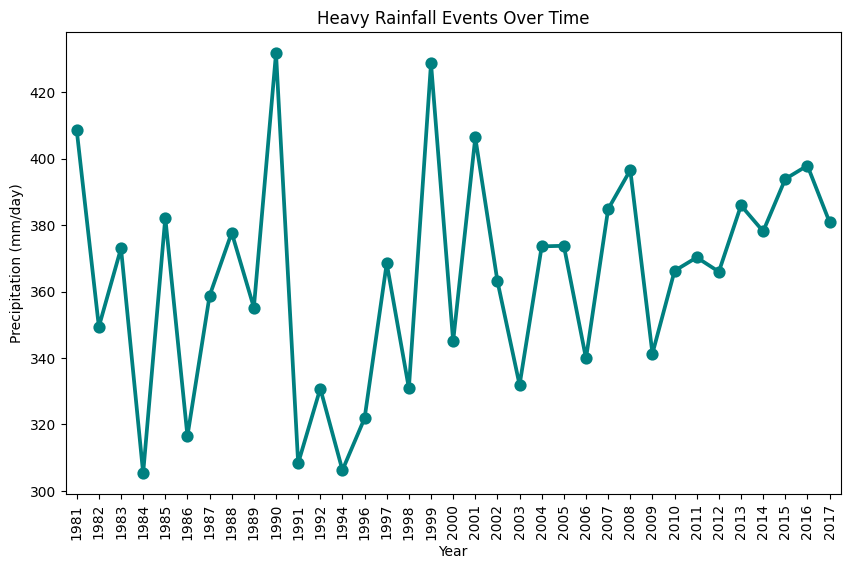

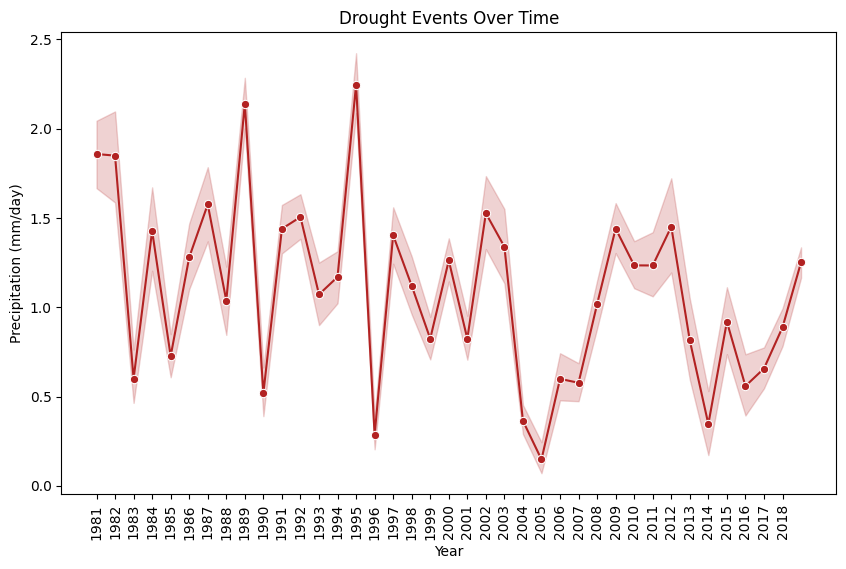

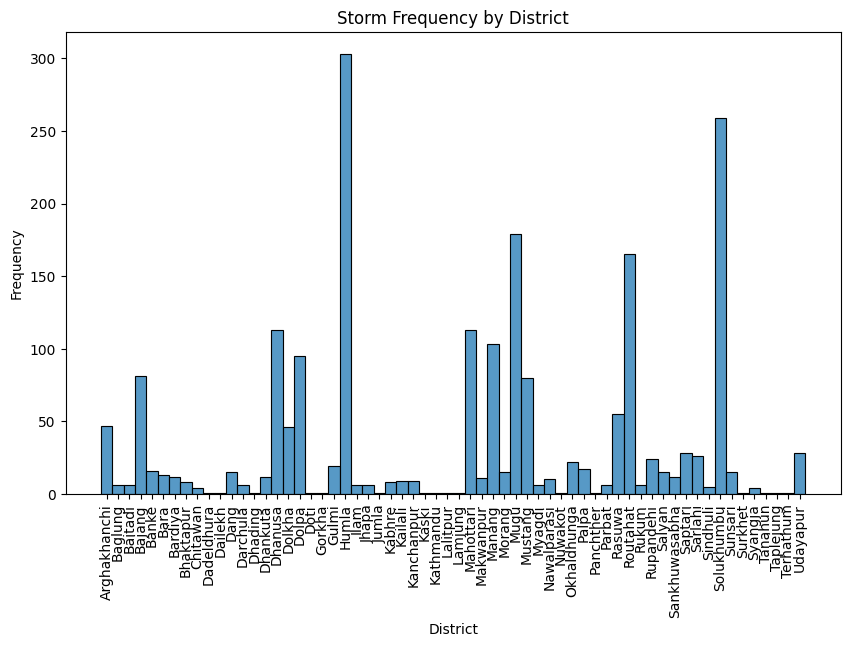

In [16]:
# Plotting some of the extreme events

# Plotting heavy rainfall events over time
plt.figure(figsize=(10, 6)) # Setting the figure size
# Point plot
sns.pointplot(x='YEAR', y='PRECTOT', data=df[df['PRECTOT']> thresholds['high_precipitation_threshold']], errorbar=None, color='teal')
plt.title('Heavy Rainfall Events Over Time') # Adding the title
# Adding x and y labels
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.xticks(rotation=90)
plt.show() # Displaying a figure

# Plotting drought events over time
plt.figure(figsize=(10, 6)) # Setting the figure size
# Line plot
sns.lineplot(x='YEAR', y='PRECTOT', data=df[df['PRECTOT']< thresholds['low_precipitation_threshold']], marker='o', color='firebrick')
plt.title('Drought Events Over Time') # Adding the title
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.xticks(np.arange(1981,2019,1),rotation=90)
plt.show() # Displaying a figure

# Plotting storm frequency by district
plt.figure(figsize=(10, 6)) # Setting the figure size
# Histogram plot
sns.histplot(x='DISTRICT', data=df[(df['WS10M_MAX'] > thresholds['high_wind_speed_10M_threshold']) | (df['WS50M_MAX'] > thresholds['high_wind_speed_50M_threshold'])])
plt.title('Storm Frequency by District') # Adding the title
# Adding x and y labels
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show() # Displaying a figure



### 2c. Create a new column for temperature range

In [17]:
# c) Creating a new column for temperature range. 
# Subtracting 'T2M_MIN' from 'T2M_MAX' 
# T2M_MAX= Maximum Temperature and T2M_MIN= Minimum temperature
df['Temperature_Range'] = df['T2M_MAX'] - df['T2M_MIN'] 
df

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


### 2d. Evaluate median values of precipitation.

In [18]:
# d) Evaluating median values of precipitation using median() function
precipitation_median = df['PRECTOT'].median()
print("Median of Precipitation:", precipitation_median)

Median of Precipitation: 22.05


In [22]:
# g) Analyze the distribution of relative humidity. 

# Displaying summary statistics of relative humidity

distribution_relative_humidity = df['RH2M'].describe()
distribution_relative_humidity

count    29016.000000
mean        55.560993
std         20.731268
min          8.510000
25%         38.800000
50%         52.670000
75%         74.830000
max         94.820000
Name: RH2M, dtype: float64

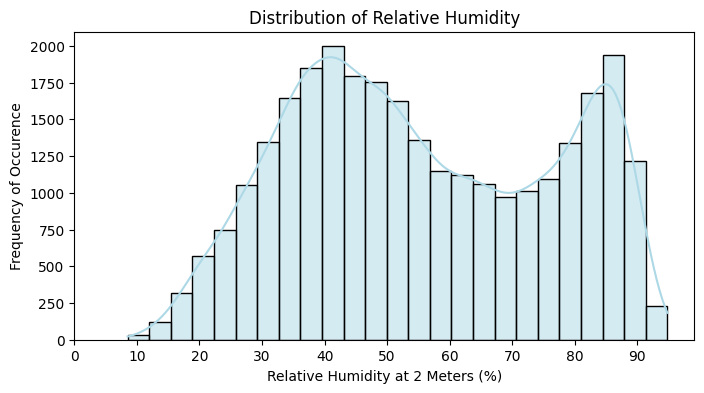

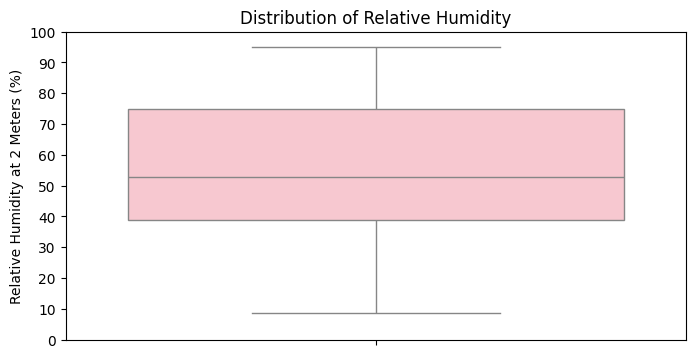

In [23]:
plt.figure(figsize=(8, 4)) # Setting the figure size
# Histogram plot for relative humidity
sns.histplot(data= df, x = 'RH2M',bins= 25, color='lightblue', edgecolor='black', kde= True)
plt.title('Distribution of Relative Humidity') # Adding the title
# Adding x and y labels
plt.xlabel('Relative Humidity at 2 Meters (%)')
plt.ylabel('Frequency of Occurence')
plt.xticks(np.arange(0,100,10)) # Adding x-axis ticks
plt.show() # Displaying a figure

plt.figure(figsize=(8, 4)) # Setting the figure size
# Boxplot for relative humidity
sns.boxplot(data= df, y = 'RH2M', color='pink')
plt.title('Distribution of Relative Humidity') # Adding the title
plt.ylabel('Relative Humidity at 2 Meters (%)') # Adding y-axis label
plt.yticks(np.arange(0,110,10)) # Adding y-axis ticks
plt.show() # Displaying a figure

### 2h. Handle missing values in the dataset.

In [24]:
# h) Handle missing values in the dataset. 
df.isnull() # Checking the missing values using the isnull() method

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum() # Checking the total count of null values for each column

DATE                     0
YEAR                     0
MONTH                    0
DISTRICT                 0
LAT                      0
LON                      0
PRECTOT                  0
PS                       0
QV2M                     0
RH2M                     0
T2M                      0
T2MWET                   0
T2M_MAX                  0
T2M_MIN                  0
T2M_RANGE                0
TS                       0
WS10M                    0
WS10M_MAX                0
WS10M_MIN                0
WS10M_RANGE              0
WS50M                    0
WS50M_MAX                0
WS50M_MIN                0
WS50M_RANGE              0
Binary_Precipitation     0
Binary_Temperature       0
Binary_Humidity          0
Binary_Wind_Speed_10M    0
Binary_Wind_Speed_50M    0
district_numerical       0
Extreme_Events           0
Temperature_Range        0
dtype: int64

In [26]:
df2 = df.fillna(value=0) # Replacing the null values with zero
df2

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [27]:
# Filling null values with the previous value row-wise
df3 = df.ffill()
df3

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [28]:
# Filling null values with the next value row-wise
df4 = df.bfill()
df4

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [29]:
# Filling null values with the previous value column-wise
df5 = df.ffill(axis=1)
df5

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.4,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.3,4.0,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [30]:
# Filling null values with the next value column-wise
df6 = df.bfill(axis=1)
df6

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.4,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.3,4.0,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [31]:
# Replacing Nan value with value 20 using the replace function
df.replace(to_replace = np.nan, value = 20)  
df

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


#### Dropping null values

In [32]:
df.dropna() # Dropping rows with at least one missing value

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [33]:
df.dropna(axis=1) # Dropping columns with at least one missing value

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [34]:
df.dropna(how = 'all') # Dropping rows where all values are missing 

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [35]:
new_df = df.dropna(axis = 0, how ='any')  # Removing rows where any value is missing
new_df

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


#### Handing missing values in each column
If there were missing values, it could be handled as follows:

In [36]:
# Copying dataframe into new dataframe
df_new = df.copy()
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [37]:
# Filling the missing date value with the previous row value
df_new['DATE'] = df_new['DATE'].ffill() 
# Filling the missing Year value with the next row value
df_new['YEAR'] = df_new['YEAR'].bfill() 
# Filling the missing District value with the previous district value in a row
df_new['DISTRICT'] = df_new['DISTRICT'].ffill() 
 # Filling the missing Latitude value with the previous row value
df_new['LAT'] = df_new['LAT'].ffill()
 # Filling the missing Longitude value with the next row value
df_new['LON'] = df_new['LON'].bfill()

In [38]:
# Filling the missing precipitation value with the median value
df_new['PRECTOT'] = df_new['PRECTOT'].fillna(df_new['PRECTOT'].median())
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [39]:
# Filling the missing specific pressure, specific humidity, relative humidity temperature, wet bulb temperature,
# minimum temperature, maximum temperature, and earth skin temperature values with their month's respective mean values
# Filling the missing surface pressure value with 0
df_new['PS'] = df_new['PS'].fillna(df_new.groupby('MONTH')['PS'].transform('mean'))
df_new['QV2M'] = df_new['QV2M'].fillna(df_new.groupby('MONTH')['QV2M'].transform('mean'))
df_new['RH2M'] = df_new['RH2M'].fillna(df_new.groupby('MONTH')['RH2M'].transform('mean'))
df_new['T2M'] =df_new['T2M'].fillna(df_new.groupby('MONTH')['T2M'].transform('mean'))
df_new['T2MWET'] =df_new['T2MWET'].fillna(df_new.groupby('MONTH')['T2MWET'].transform('mean'))
df_new['T2M_MAX'] = df_new['T2M_MAX'].fillna(df_new.groupby('MONTH')['T2M_MAX'].transform('mean'))
df_new['T2M_MIN'] = df_new['T2M_MIN'].fillna(df_new.groupby('MONTH')['T2M_MIN'].transform('mean'))
df_new['TS'] = df_new['TS'].fillna(df_new.groupby('MONTH')['TS'].transform('mean'))
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_MIN,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,1.06,3.16,0,0,0,0,0,0,No Extreme Event,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,1.09,4.53,0,0,0,0,0,0,Drought,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,1.38,4.34,0,0,0,0,0,0,No Extreme Event,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,1.35,4.31,0,0,0,0,0,0,No Extreme Event,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1.30,4.00,0,1,0,0,0,0,Heat Waves,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,1.93,3.39,0,0,0,0,0,61,No Extreme Event,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.05,2.65,0,0,0,0,0,61,No Extreme Event,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0.97,2.76,0,0,0,0,0,61,Drought,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0.67,2.62,0,0,0,0,0,61,Drought,8.77


In [40]:
# Handling missing values for the Temperature Range 

# Defining a new variable Temparature_Diff
df_new['Temperature_Diff']  = df_new['T2M_MAX'] - df_new['T2M_MIN']
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range,Temperature_Diff
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,3.16,0,0,0,0,0,0,No Extreme Event,10.03,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,4.53,0,0,0,0,0,0,Drought,13.08,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,4.34,0,0,0,0,0,0,No Extreme Event,13.52,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,4.31,0,0,0,0,0,0,No Extreme Event,15.04,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,4.00,0,1,0,0,0,0,Heat Waves,13.42,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,3.39,0,0,0,0,0,61,No Extreme Event,5.54,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.65,0,0,0,0,0,61,No Extreme Event,4.92,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,2.76,0,0,0,0,0,61,Drought,6.95,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,2.62,0,0,0,0,0,61,Drought,8.77,8.77


In [41]:
# Filling the missing wind speed, maximum wind speed, and minimum wind speed at 10 and 50 meters (m/s) with their respective months' mean values

df_new['WS10M']= df_new['WS10M'].fillna(df_new.groupby('MONTH')['WS10M'].transform('mean'))
df_new['WS10M_MAX'] = df_new['WS10M_MAX'].fillna(df_new.groupby('MONTH')['WS10M_MAX'].transform('mean'))
df_new['WS10M_MIN']= df_new['WS10M_MIN'].fillna(df_new.groupby('MONTH')['WS10M_MIN'].transform('mean'))
df_new['WS50M'] = df_new['WS50M'].fillna(df_new.groupby('MONTH')['WS50M'].transform('mean'))
df_new['WS50M_MAX'] = df_new['WS50M_MAX'].fillna(df_new.groupby('MONTH')['WS50M_MAX'].transform('mean'))
df_new['WS50M_MIN'] = df_new['WS50M_MIN'].fillna(df_new.groupby('MONTH')['WS50M_MIN'].transform('mean'))
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range,Temperature_Diff
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,3.16,0,0,0,0,0,0,No Extreme Event,10.03,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,4.53,0,0,0,0,0,0,Drought,13.08,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,4.34,0,0,0,0,0,0,No Extreme Event,13.52,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,4.31,0,0,0,0,0,0,No Extreme Event,15.04,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,4.00,0,1,0,0,0,0,Heat Waves,13.42,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,3.39,0,0,0,0,0,61,No Extreme Event,5.54,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.65,0,0,0,0,0,61,No Extreme Event,4.92,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,2.76,0,0,0,0,0,61,Drought,6.95,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,2.62,0,0,0,0,0,61,Drought,8.77,8.77


In [42]:
# Handling missing values for the Wind Speed Range at 10m and 50m

# Defining new variables Wind_Speed_Diff_10M and Wind_Speed_Diff_50M
df_new['Wind_Speed_Diff_10M']  = df_new['WS10M_MAX'] - df_new['WS10M_MIN']
df_new['Wind_Speed_Diff_50M']  = df_new['WS50M_MAX'] - df_new['WS50M_MIN']
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range,Temperature_Diff,Wind_Speed_Diff_10M,Wind_Speed_Diff_50M
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,0,0,0,0,0,No Extreme Event,10.03,10.03,2.58,3.16
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,0,0,0,0,0,Drought,13.08,13.08,3.93,4.53
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,0,0,0,0,0,No Extreme Event,13.52,13.52,3.65,4.34
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,0,0,0,0,0,No Extreme Event,15.04,15.04,3.71,4.31
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1,0,0,0,0,Heat Waves,13.42,13.42,3.47,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,0,0,0,0,61,No Extreme Event,5.54,5.54,3.40,3.39
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,0,0,0,0,61,No Extreme Event,4.92,4.92,2.69,2.65
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0,0,0,0,61,Drought,6.95,6.95,2.59,2.76
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0,0,0,0,61,Drought,8.77,8.77,2.46,2.62


In [43]:
df_new

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range,Temperature_Diff,Wind_Speed_Diff_10M,Wind_Speed_Diff_50M
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,0,0,0,0,0,No Extreme Event,10.03,10.03,2.58,3.16
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,0,0,0,0,0,Drought,13.08,13.08,3.93,4.53
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,0,0,0,0,0,No Extreme Event,13.52,13.52,3.65,4.34
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,0,0,0,0,0,No Extreme Event,15.04,15.04,3.71,4.31
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,1,0,0,0,0,Heat Waves,13.42,13.42,3.47,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,0,0,0,0,61,No Extreme Event,5.54,5.54,3.40,3.39
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,0,0,0,0,61,No Extreme Event,4.92,4.92,2.69,2.65
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,0,0,0,0,61,Drought,6.95,6.95,2.59,2.76
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,0,0,0,0,61,Drought,8.77,8.77,2.46,2.62


### 2i. Derive a new variable representing the difference between maximum and minimum temperatures.

In [44]:

# i) Derive a new variable representing the difference between maximum and minimum temperatures. 
# Defining the new variable Temp_diff by subtracting T2M_MIN from T2M_MAX
df['Temp_Diff']  = df['T2M_MAX'] - df['T2M_MIN']

# Displaying descriptive statistics for temparature difference 
df['Temp_Diff'].describe()

count    29016.000000
mean        10.810547
std          2.812743
min          4.610000
25%          8.560000
50%         11.170000
75%         12.910000
max         18.990000
Name: Temp_Diff, dtype: float64

In [45]:
df

,DATE,YEAR,MONTH,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,...,WS50M_RANGE,Binary_Precipitation,Binary_Temperature,Binary_Humidity,Binary_Wind_Speed_10M,Binary_Wind_Speed_50M,district_numerical,Extreme_Events,Temperature_Range,Temp_Diff
0,1981-01-31,1981,1,Arghakhanchi,27.9,83.2,67.31,93.78,5.28,53.09,...,3.16,0,0,0,0,0,0,No Extreme Event,10.03,10.03
1,1981-02-28,1981,2,Arghakhanchi,27.9,83.2,3.37,93.52,5.13,40.88,...,4.53,0,0,0,0,0,0,Drought,13.08,13.08
2,1981-03-31,1981,3,Arghakhanchi,27.9,83.2,26.02,93.40,5.91,35.84,...,4.34,0,0,0,0,0,0,No Extreme Event,13.52,13.52
3,1981-04-30,1981,4,Arghakhanchi,27.9,83.2,46.15,93.03,6.52,29.81,...,4.31,0,0,0,0,0,0,No Extreme Event,15.04,15.04
4,1981-05-31,1981,5,Arghakhanchi,27.9,83.2,69.45,92.75,9.95,37.25,...,4.00,0,1,0,0,0,0,Heat Waves,13.42,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29011,2019-08-31,2019,8,Udayapur,26.9,86.5,4.46,94.41,20.34,85.51,...,3.39,0,0,0,0,0,61,No Extreme Event,5.54,5.54
29012,2019-09-30,2019,9,Udayapur,26.9,86.5,9.93,94.92,18.62,87.16,...,2.65,0,0,0,0,0,61,No Extreme Event,4.92,4.92
29013,2019-10-31,2019,10,Udayapur,26.9,86.5,0.28,95.34,15.04,84.67,...,2.76,0,0,0,0,0,61,Drought,6.95,6.95
29014,2019-11-30,2019,11,Udayapur,26.9,86.5,0.04,95.48,11.26,73.08,...,2.62,0,0,0,0,0,61,Drought,8.77,8.77


## 3. Initial Data Analysis

### 3a.  Write code to calculate and show the summary statistics (sum, mean, median, standard deviation, maximum, and minimum) of the variables temperature, precipitation, wind_speed, humidity, and pressure.


In [46]:
# 3a  summary statistics (sum, mean, median, standard deviation, maximum, and minimum) of the variables 
# temperature, precipitation, wind speed, humidity, and pressure in an array

# Calculating summary statistics using describe() method

# Passing variables to a list
vars = ['T2M','PRECTOT', 'WS10M', 'WS50M','QV2M','RH2M', 'PS']
summary_statistics = df[vars].describe()
print("-------------------------------------------Summary Statistics----------------------------------------")
# Finally displaying summary statistics
summary_statistics

-------------------------------------------Summary Statistics----------------------------------------


,T2M,PRECTOT,WS10M,WS50M,QV2M,RH2M,PS
count,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000
mean,15.795138,68.922705,2.373433,2.732222,8.465428,55.560993,82.903742
std,9.044101,98.874269,0.493615,0.742617,5.217317,20.731268,10.713284
min,-17.810000,0.000000,1.380000,1.430000,0.750000,8.510000,55.460000
25%,10.027500,3.740000,1.980000,2.210000,4.080000,38.800000,77.700000
50%,16.660000,22.050000,2.330000,2.590000,6.730000,52.670000,83.725000
75%,22.390000,99.745000,2.690000,3.130000,12.870000,74.830000,92.790000
max,35.590000,641.840000,5.840000,7.430000,21.700000,94.820000,99.780000


In [47]:
# Calculating sum, mean, median, standard deviation, maximum, and minimum

# Passing variables to a list
vars = ['T2M', 'PRECTOT', 'WS10M', 'WS50M', 'QV2M', 'RH2M', 'PS']
# Passing full names of variables to a list
full_vars = ['Temperature', 'Precipitation',
             'Wind Speed at 10 Meters',
             'Wind Speed at 50 Meters',
             'Specific Humidity at 2 Meters',
             'Relative Humidity at 2 Meters',
             'Surface Pressure']

for var, full_var in zip(vars, full_vars):
    # Displaying the summary statistics
    print(f'------Summary statistics of {full_var}---------')
    print(f'The sum of {full_var} is:', df[var].sum())
    print(f'The mean of {full_var} is:', df[var].mean())
    print(f'The median of {full_var} is:', df[var].median())
    print(f'The standard deviation of {full_var} is:', df[var].std())
    print(f'The maximum of {full_var} is:', df[var].max())
    print(f'The minimum of {full_var} is:', df[var].min())
    print("\n")


------Summary statistics of Temperature---------
The sum of Temperature is: 458311.73
The mean of Temperature is: 15.795138199614005
The median of Temperature is: 16.66
The standard deviation of Temperature is: 9.044100970951535
The maximum of Temperature is: 35.59
The minimum of Temperature is: -17.81


------Summary statistics of Precipitation---------
The sum of Precipitation is: 1999861.22
The mean of Precipitation is: 68.92270540391507
The median of Precipitation is: 22.05
The standard deviation of Precipitation is: 98.87426939073762
The maximum of Precipitation is: 641.84
The minimum of Precipitation is: 0.0


------Summary statistics of Wind Speed at 10 Meters---------
The sum of Wind Speed at 10 Meters is: 68867.53
The mean of Wind Speed at 10 Meters is: 2.373432933553901
The median of Wind Speed at 10 Meters is: 2.33
The standard deviation of Wind Speed at 10 Meters is: 0.49361458911576633
The maximum of Wind Speed at 10 Meters is: 5.84
The minimum of Wind Speed at 10 Meters i

### 3b. Write code to calculate and show the correlation between the variables temperature, precipitation, wind_speed, humidity, and pressure. Present the result using a heatmap and interpret the results.


--------The correlation between the variables--------
               T2M   PRECTOT     WS10M     WS50M      QV2M      RH2M        PS
T2M      1.000000  0.383365  0.087892  0.358080  0.667068  0.098460  0.784659
PRECTOT  0.383365  1.000000  0.006413  0.057036  0.746833  0.636265  0.103715
WS10M    0.087892  0.006413  1.000000  0.839889 -0.074207 -0.293665 -0.159638
WS50M    0.358080  0.057036  0.839889  1.000000  0.072261 -0.310253  0.298750
QV2M     0.667068  0.746833 -0.074207  0.072261  1.000000  0.765475  0.332169
RH2M     0.098460  0.636265 -0.293665 -0.310253  0.765475  1.000000 -0.158664
PS       0.784659  0.103715 -0.159638  0.298750  0.332169 -0.158664  1.000000


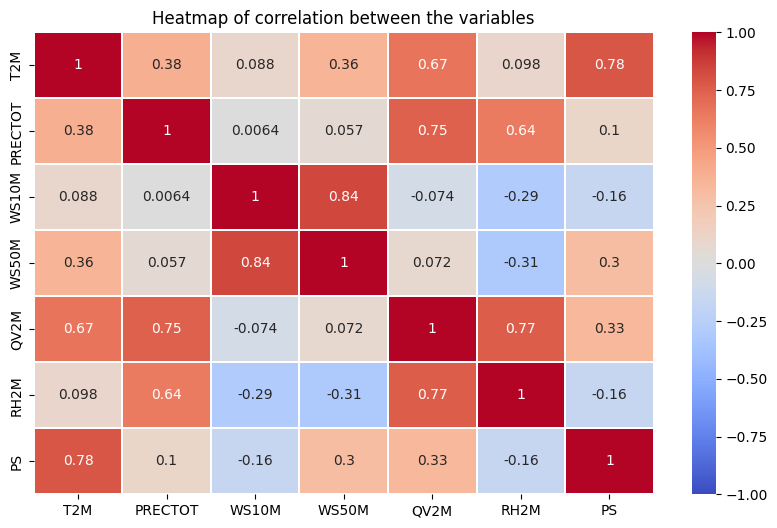

In [48]:
# Passing variables to a list
vars = ['T2M', 'PRECTOT', 'WS10M', 'WS50M', 'QV2M', 'RH2M', 'PS']

# Calculating correlation matrix of variables
correlation = df[vars].corr()

# Printing the correlation matrix
print("--------The correlation between the variables--------\n", correlation)


plt.figure(figsize=(10, 6)) # Setting the figure size
# Generating the heatmap
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True), linewidth=0.1, vmin=-1, vmax=1,annot_kws={'fontsize': 10})
# Adding the title
plt.title('Heatmap of correlation between the variables')
plt.show() # Display plot

## 4. Data Exploration and Visualization

### 4a. Write code to calculate and show correlation of each climate variable with the target variable (e.g., precipitation). Also, briefly explain the result.

-------- The correlation of each variable with the precipitaion --------

 PRECTOT        1.000000
QV2M           0.746833
T2MWET         0.652612
RH2M           0.636265
T2M_MIN        0.454551
TS             0.414148
T2M            0.383365
T2M_MAX        0.269155
WS50M_MIN      0.224963
PS             0.103715
WS10M_MIN      0.080471
WS50M          0.057036
WS10M          0.006413
WS50M_MAX     -0.084230
WS10M_MAX     -0.136388
WS10M_RANGE   -0.162783
WS50M_RANGE   -0.237509
T2M_RANGE     -0.660910
Name: PRECTOT, dtype: float64


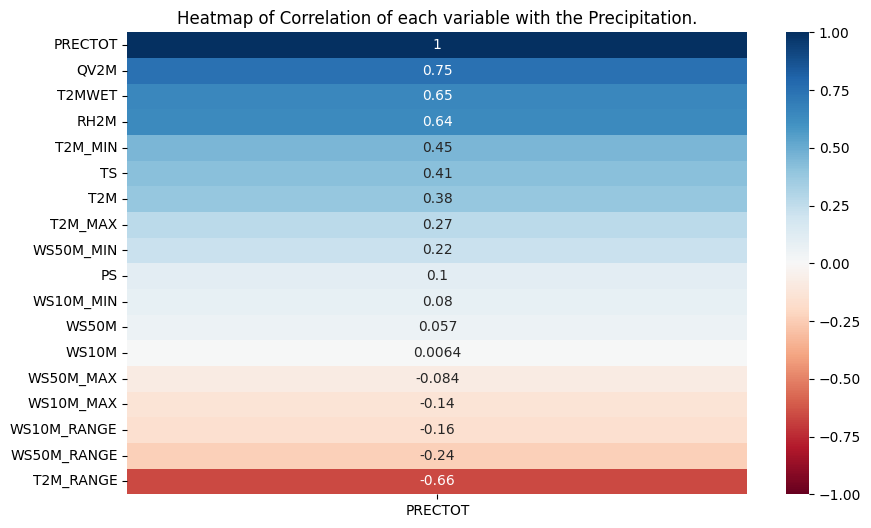

In [49]:
# Passing  climate variables to a  list
variables_list = [
    'PRECTOT', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN',
    'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE',
    'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE'
]

# Calculating the correlation matrix
correlation_matrix = df[variables_list].corr()[['PRECTOT']].sort_values(by='PRECTOT',ascending=False)

# Correlation with Precipitation 
corr_with_prec = correlation_matrix['PRECTOT'].sort_values(ascending=False)

# Printing the correlation values with precipitation
print("-------- The correlation of each variable with the precipitaion --------\n\n", corr_with_prec)

# Generating the heatmap
plt.figure(figsize=(10,6)) # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation of each variable with the Precipitation.') # Adds title
plt.show() # Display plot


### 4b. Write code to show histogram plots and boxplots to visualize the distribution of the variables temperature, precipitation, wind_speed, humidity, and pressure. Interpret the results and comment about the distribution of each variable.


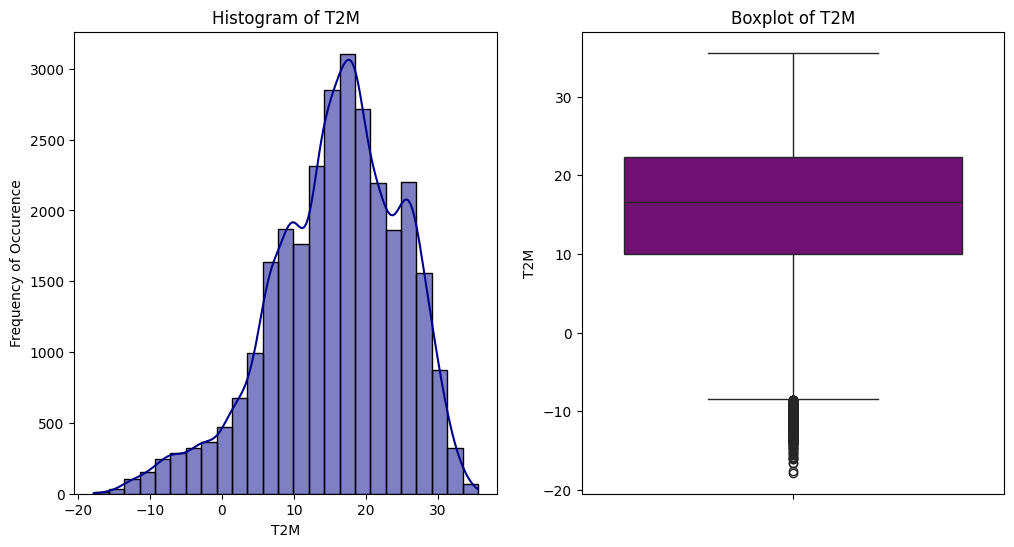

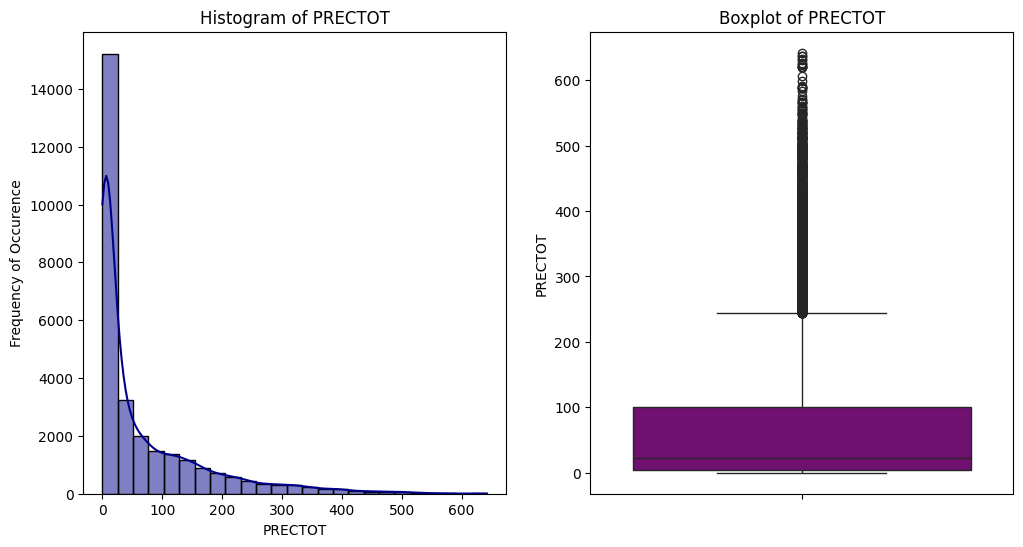

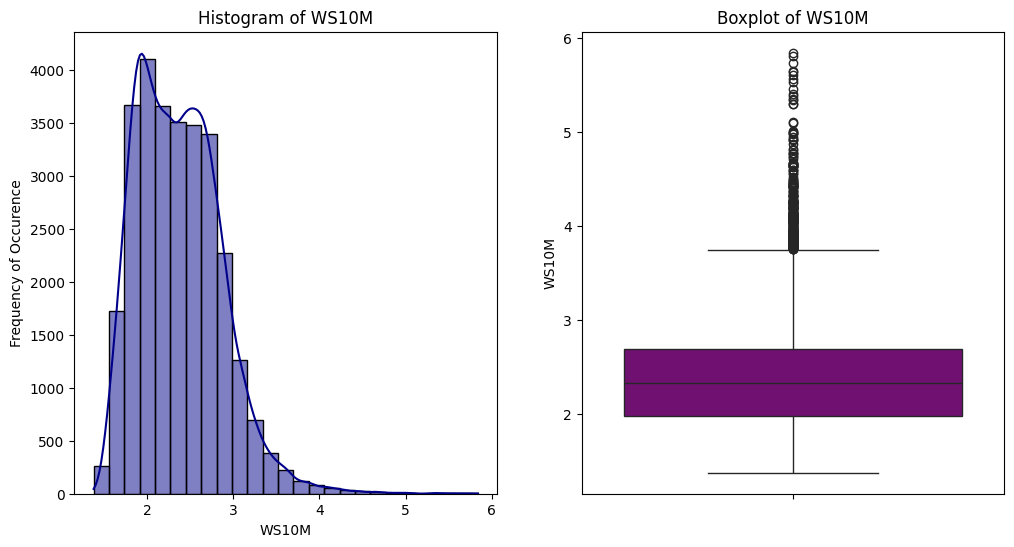

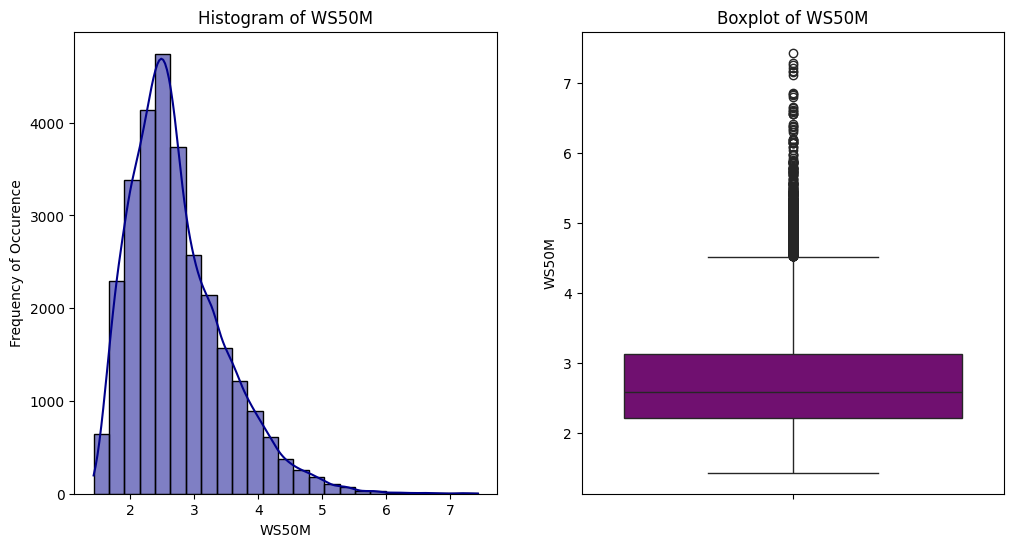

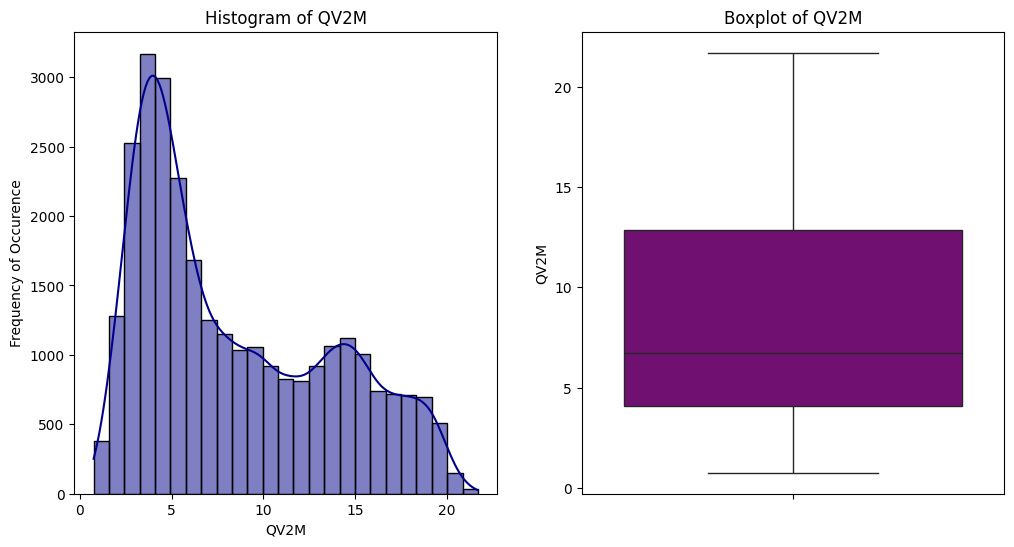

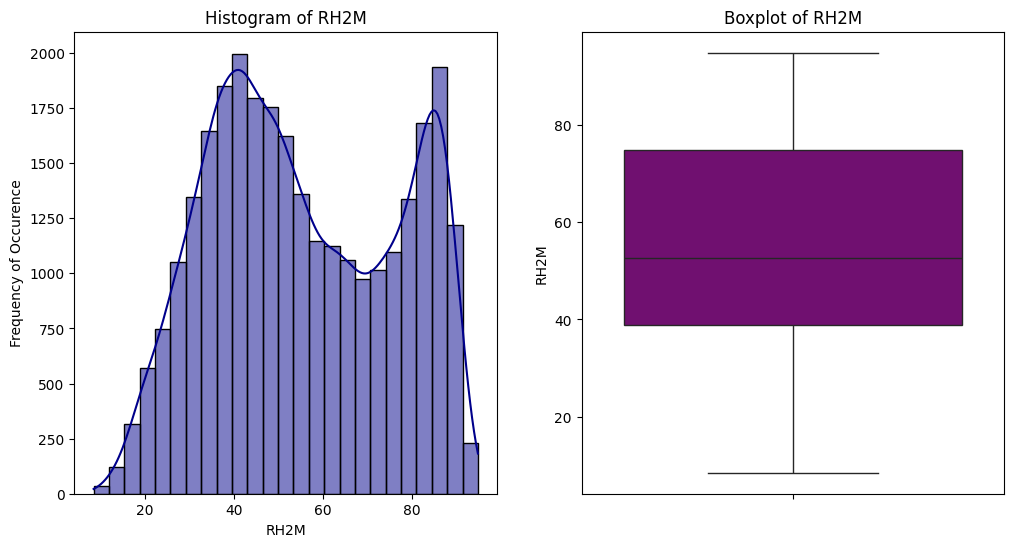

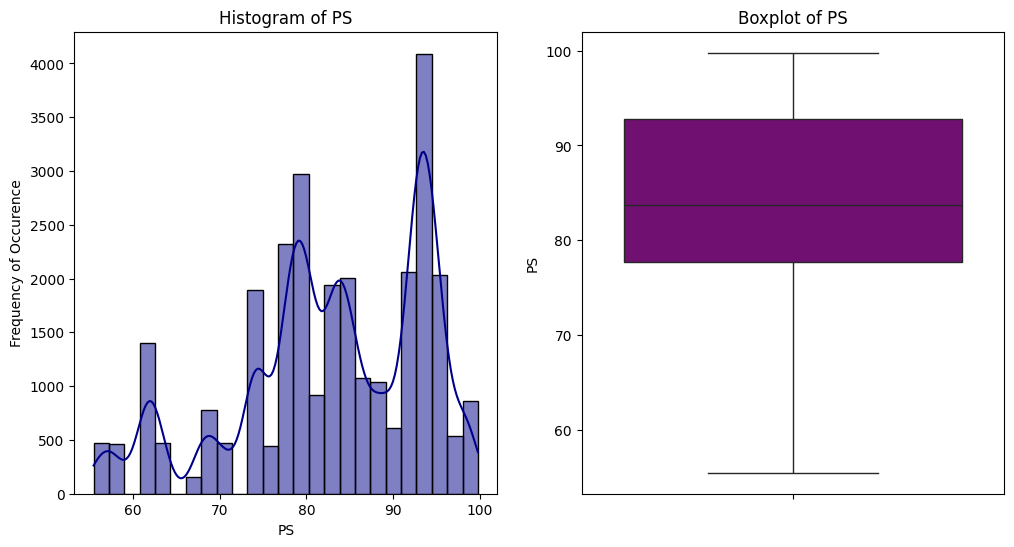

In [50]:
# Defining variables in the list
variables =['T2M', 'PRECTOT', 'WS10M', 'WS50M', 'QV2M', 'RH2M', 'PS']

for variable in variables:
    # Generating histogram plot for defined variables
    plt.figure(figsize=(12, 6)) # Setting the figure size
    plt.subplot(1,2,1) # Creates a subplot
    sns.histplot(data= df, x = variable,bins= 25, color='darkblue', edgecolor='black', kde= True)
    plt.title(f'Histogram of {variable}') # Adding the title
    # Adding x and y labels
    plt.xlabel(f'{variable}')
    plt.ylabel('Frequency of Occurence')


    # Generating boxplot for defined variables
    plt.subplot(1,2,2)
    sns.boxplot(data= df, y =  variable, color='purple')
    plt.title(f'Boxplot of {variable}') # Adding the title
    plt.ylabel(f'{variable}') # Set y-axis label
plt.show() # Display plot


### 4c. Write code to show a bar graph of the total amount of precipitation recorded in each District. Use proper labels in the graph and interpret the results.


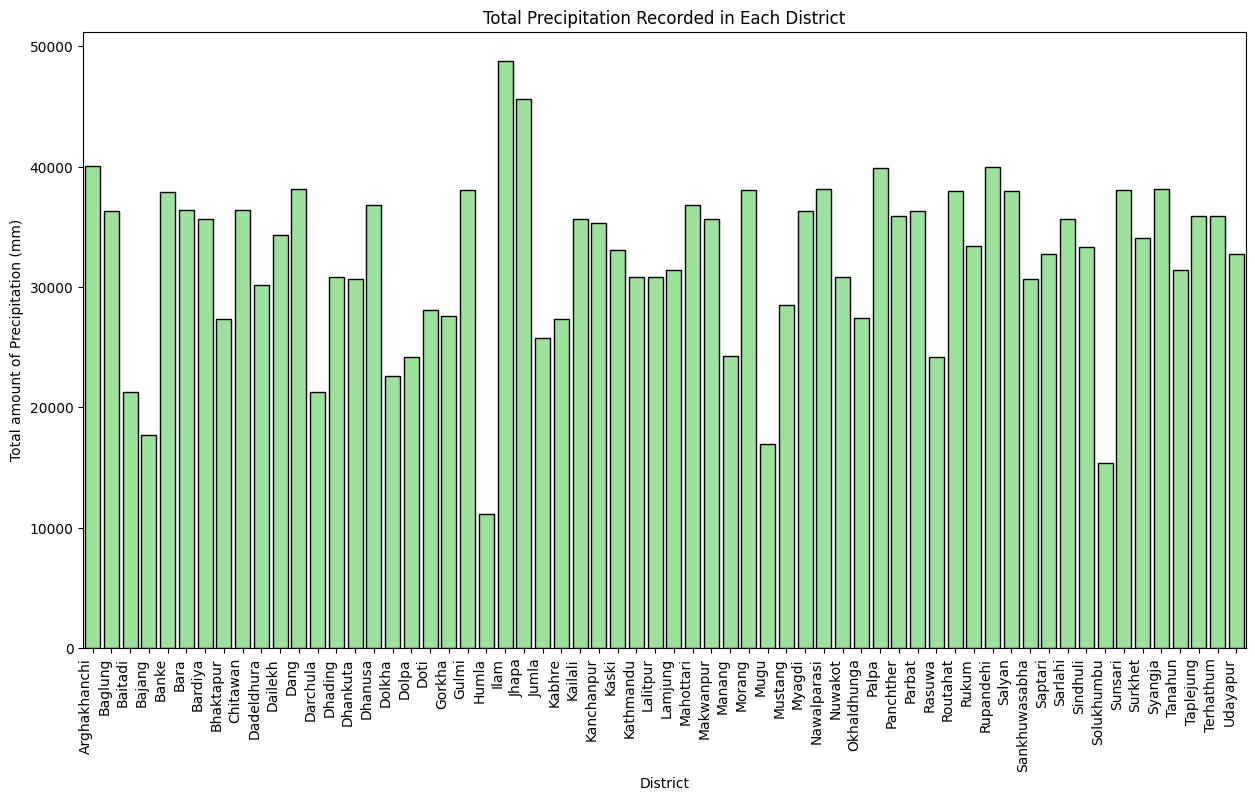

In [51]:
# Calculating total amount of precipitation recorded in each district using estimator = sum

# Generating a bar graph
plt.figure(figsize=(15, 8)) # Setting figure size
sns.barplot(data= df, x= 'DISTRICT', y='PRECTOT', estimator='sum', edgecolor = 'black', color='lightgreen', errorbar=None)
plt.title('Total Precipitation Recorded in Each District') # Adds title
# Adds x and y labels
plt.xlabel('District')
plt.ylabel('Total amount of Precipitation (mm)')
plt.xticks(rotation=90, ha='right')  # Rotating the x-axis labels by 90
plt.show() # Display a plot



### 4d. Write code to calculate the average temperature for each month of the year and present the result in a line graph. Use proper labels in the graph and interpret the results.


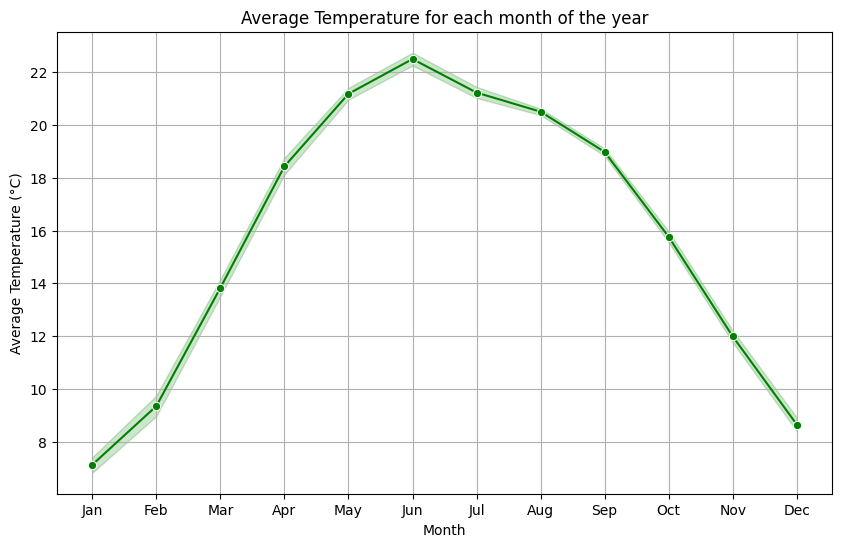

In [53]:
# Calculating the average temperature for each month of the year 
average_temperature = df.groupby(['MONTH','YEAR'])['T2M'].mean()

# Converting average_temperature to DataFrame
average_temperature= pd.DataFrame(average_temperature)

# Creating a line graph plot
plt.figure(figsize=(10, 6)) # Setting the figure size
sns.lineplot(data=average_temperature, x='MONTH', y='T2M', marker = 'o', color='green')
plt.title('Average Temperature for each month of the year') # Adding the title
# Add x and y axes labels.
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show() # Displaying the plot

### 5. Further Analysis

#### 5a. Analyzing the variation in relative humidity (RH2M) across different months

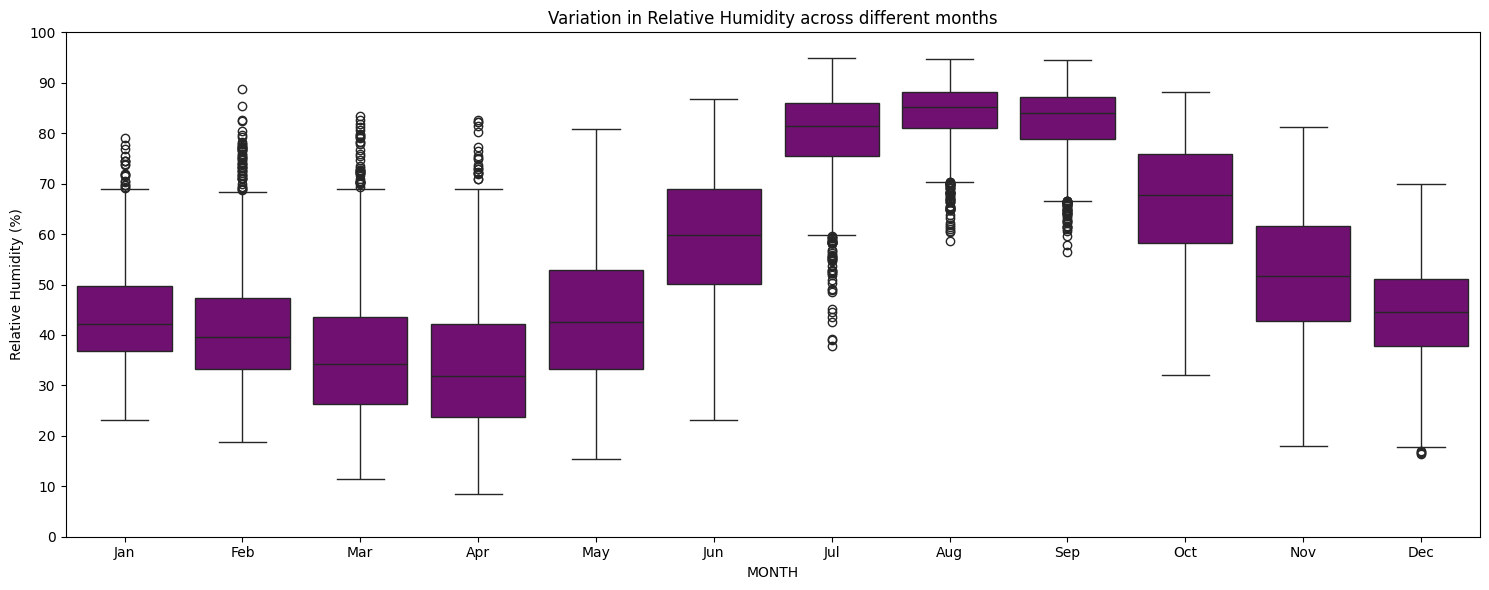

In [54]:
# Creating a box plot to analyze the variation in relative humidity (RH2M) across different months
plt.figure(figsize=(15, 6)) # Setting the figure size
sns.boxplot(data=df, x='MONTH', y='RH2M', color='purple')
plt.title('Variation in Relative Humidity across different months') # Adding the title
# Labeling the x-axis as Month
plt.xlabel('MONTH')
# Labeling the y-axis as Relative Humidity (%)
plt.ylabel('Relative Humidity (%)')
# Adding x-axis and y-axis ticks
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0,110,10))
plt.tight_layout() # Adjusts layout
plt.show() # Displaying the plot

#### 5b. District-wise Count of Extreme Temperature Events

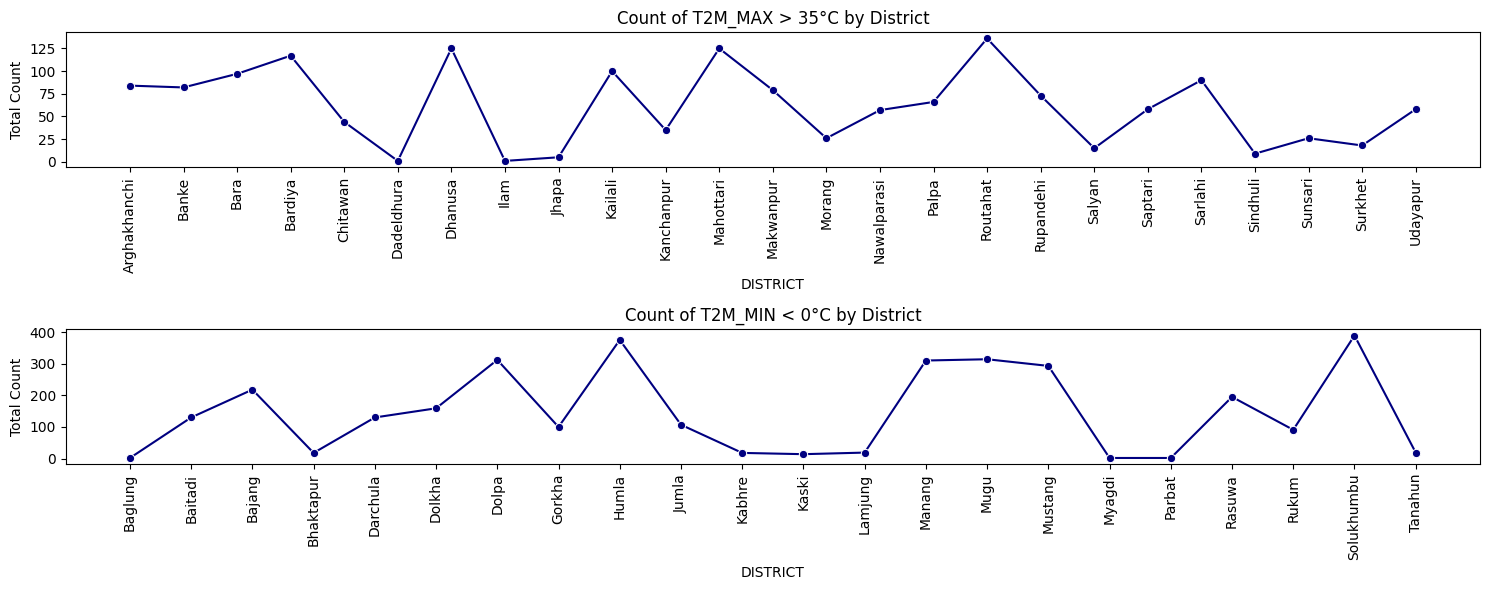

In [55]:

# Including only records where T2M_MAX is greater than 35°C and T2M_MIN is less than 0°C
temp_max = df[df['T2M_MAX'] > 35][['DISTRICT','T2M_MAX']]
temp_min = df[df['T2M_MIN'] < 0][['DISTRICT','T2M_MIN']]

# Grouping by district and counting the number of days exceeding 35 and 0 degrees Celcius
count_max = temp_max.groupby('DISTRICT').count()
count_min = temp_min.groupby('DISTRICT').count()

plt.figure(figsize=(15, 6))

# Plotting the count of T2M_MAX > 35°C and T2M_MIN < 0°C by district
plt.subplot(2, 1, 1)
sns.lineplot(data=count_max, x='DISTRICT', y='T2M_MAX', marker='o', color='navy')
plt.title('Count of T2M_MAX > 35°C by District')  # Set plot title
plt.xticks(rotation=90) 
plt.yticks(np.arange(0,150,25))
plt.ylabel('Total Count')  # Set y-axis label

plt.subplot(2, 1, 2)
sns.lineplot(data=count_min, x='DISTRICT', y='T2M_MIN', marker='o', color='navy')
plt.title('Count of T2M_MIN < 0°C by District')  # Adds plot title
plt.xticks(rotation=90)  
plt.yticks(np.arange(0,450,100))
plt.ylabel('Total Count')  # Set y-axis label
plt.tight_layout()
plt.show()


#### 5c. Analyze the distribution of average wind speeds (WS10M and WS50M) over different months. 

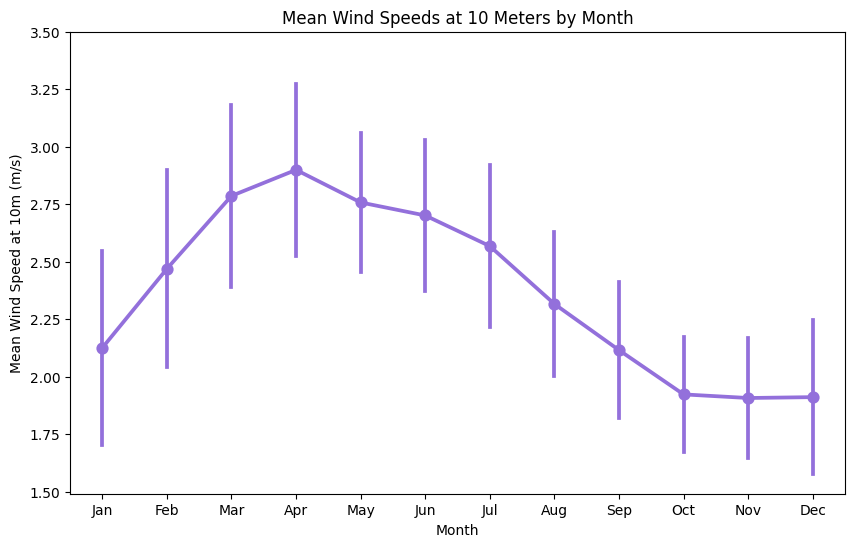

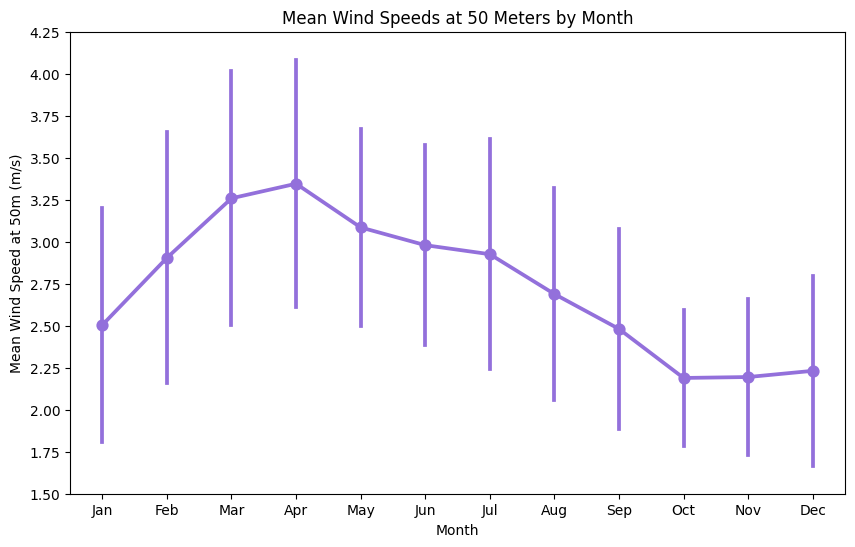

In [56]:
# Generating a point plot for WS10M
plt.figure(figsize=(10, 6)) # Setting the figure size
sns.pointplot(data=df, x='MONTH', y='WS10M', errorbar= 'sd', color='mediumpurple')  
plt.title('Mean Wind Speeds at 10 Meters by Month')
# Adding x and y labels
plt.xlabel('Month') 
plt.ylabel('Mean Wind Speed at 10m (m/s)')  
# Adding x-axis and y-axis ticks
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(1.5,3.75,0.25))
plt.show()  # Displaying the plot

# Generating a point plot for WS50M
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.pointplot(data=df, x='MONTH', y='WS50M', errorbar= 'sd',color='mediumpurple')  
plt.title('Mean Wind Speeds at 50 Meters by Month')
# Add x-axis and y-axis labels.
plt.xlabel('Month')  
plt.ylabel('Mean Wind Speed at 50m (m/s)')  
# Adding x-axis and y-axis ticks
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(1.5,4.5,0.25))
plt.show()  # Displaying the plot

#### 5d.Analyze the relation of temperature with earth skin temperature and specific pressure 

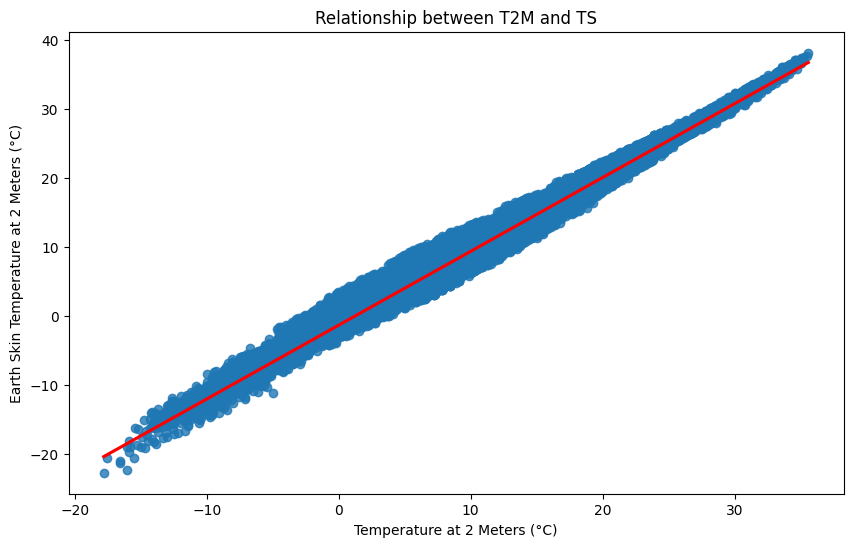

In [57]:
plt.figure(figsize=(10, 6))
# Create a scatter plot with a linear regression line for 'T2M' and 'TS'
sns.regplot(x='T2M', y='TS', data=df, line_kws={'color': 'red'})
plt.title('Relationship between T2M and TS') # Adding title to the plot
# Labeling x and y axis
plt.xlabel('Temperature at 2 Meters (°C)')
plt.ylabel('Earth Skin Temperature at 2 Meters (°C)')
plt.show()

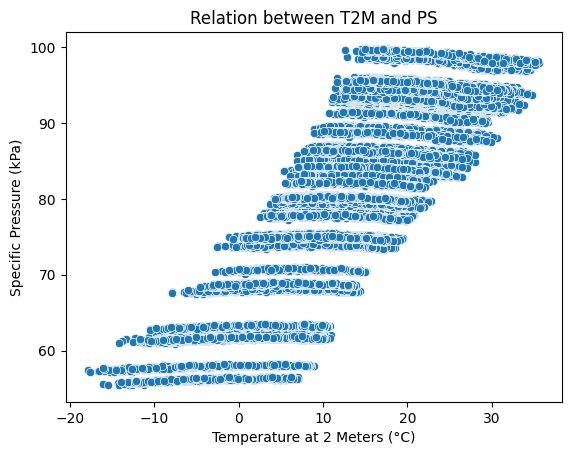

In [58]:
# Creating a Scatter plot for specific pressure and temperature
sns.scatterplot(x='T2M', y='PS', data=df)
plt.title('Relation between T2M and PS')  # Adding title to the plot
# Labeling x and y axis
plt.xlabel('Temperature at 2 Meters (°C)')
plt.ylabel('Specific Pressure (kPa)')  
plt.show()  

#### 5e. Analysis of relationship between latitude (LAT) and temperature (T2M) 

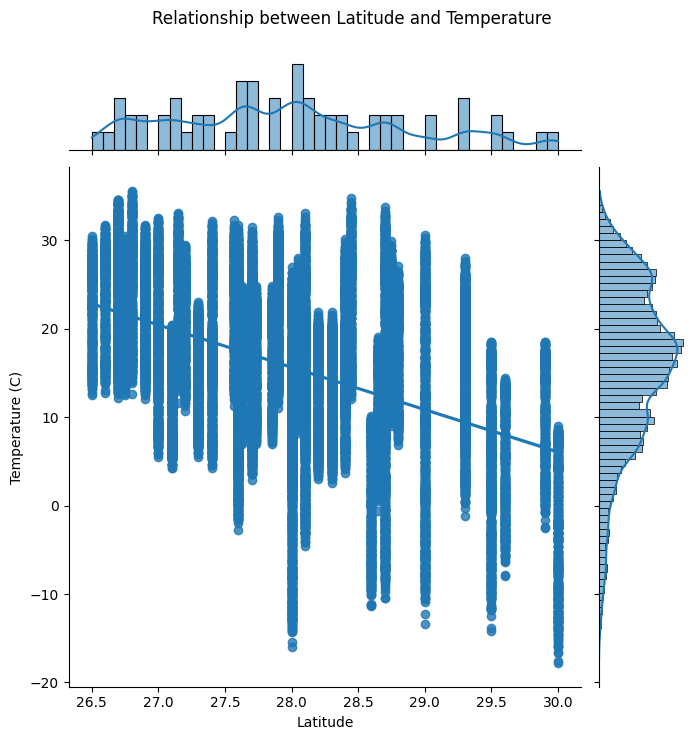

In [59]:
# Creating a joint plot to explore the relationship between latitude and temperature
sns.jointplot(kind='reg', x='LAT', y='T2M', data=df, height=7)
# Adding x and y labels
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.suptitle('Relationship between Latitude and Temperature', y=1.05) # Adding title to the plot
plt.show()

#### 5f. Visualization of Precipitation in different years

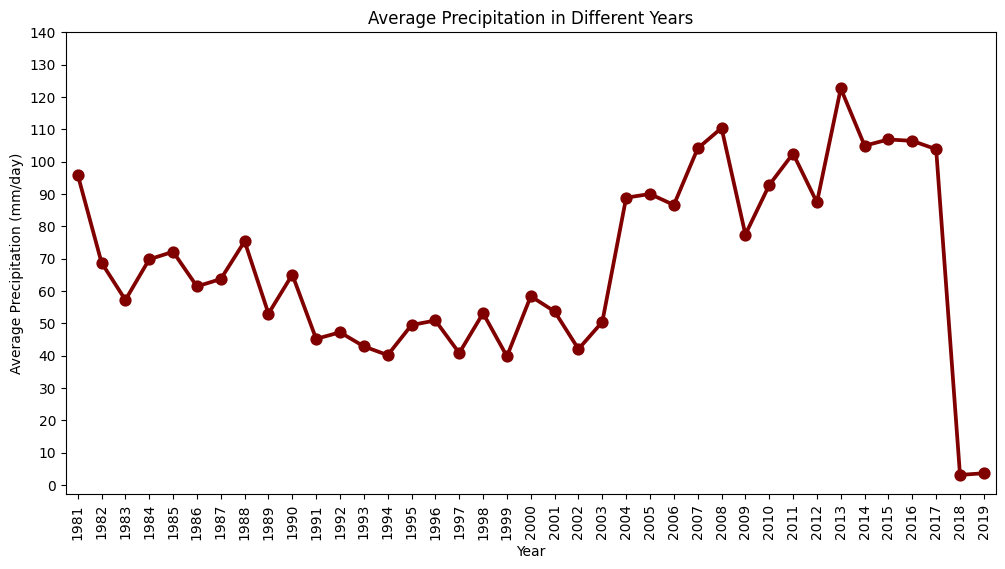

In [60]:
# Creating a point plot to visualize precipitation in different years
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.pointplot(data=df, x='YEAR', y='PRECTOT', color='maroon', errorbar=None)
plt.title('Average Precipitation in Different Years') # Adds Title
# Adding x and y labels
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm/day)')
plt.xticks(rotation=90)  # Rotating the x-axis by 90
plt.yticks(np.arange(0,150,10))
plt.show()  # Display plot


#### 5g. Temperature Distribution Across Different Ranges

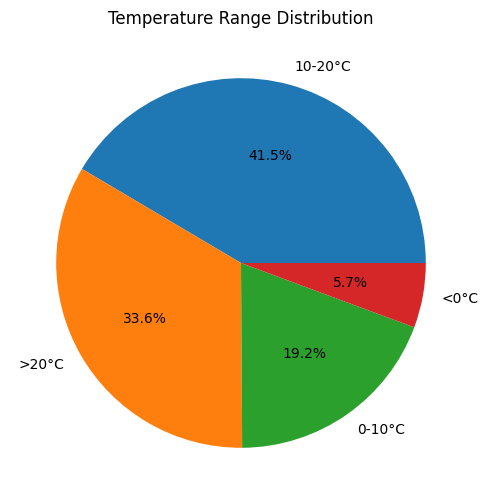

In [61]:
# Assuming temperature categories
temperature_ranges = ['<0°C', '0-10°C', '10-20°C', '>20°C']

# Classifying temperature into categories
df['Temperature_Category'] = pd.cut(df['T2M'], bins=[-float('inf'), 0, 10, 20, float('inf')], labels=temperature_ranges)

# Determining percentage distribution of temperature ranges
temperature_distribution = df['Temperature_Category'].value_counts(normalize=True) * 100

# Generating a pie chart
plt.figure(figsize=(6, 6)) # Sets the figure size
plt.pie(temperature_distribution, labels=temperature_distribution.index, autopct='%1.1f%%')
plt.title('Temperature Range Distribution') # Adds title
plt.show() # Displays plot


#### 5h. Analyze the Maximum Wind Speeds at 10 and 50 Meters in each districts

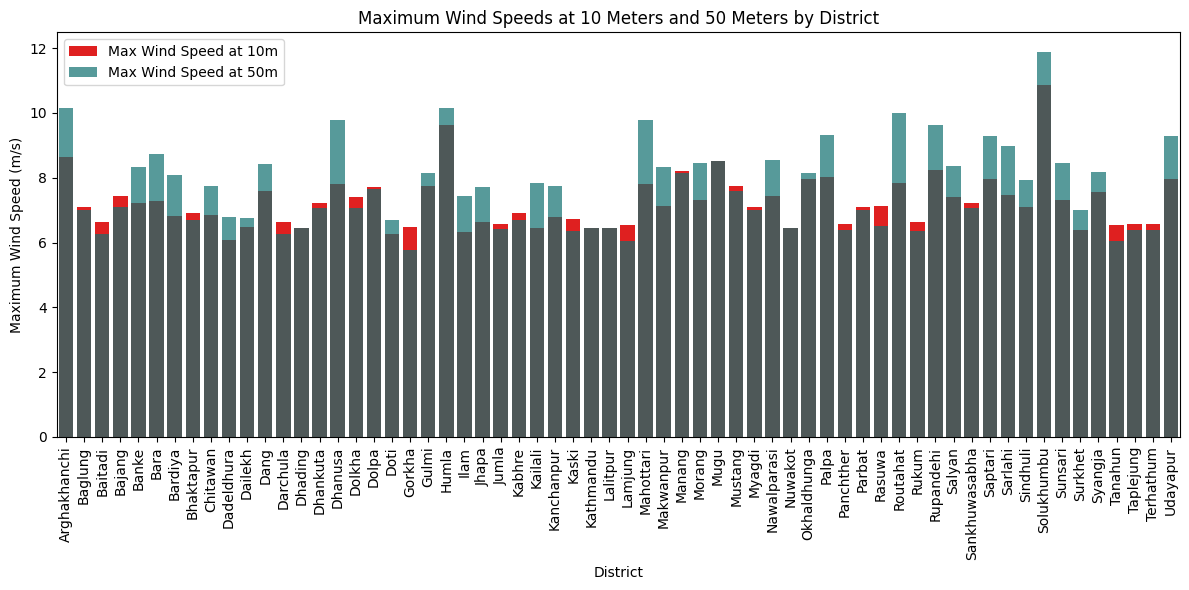

In [62]:
# Creating a bar plot to analyze maximum wind speeds
plt.figure(figsize=(12, 6))

# Bar plot for maximum wind speed at 10 meters
sns.barplot(data=df, x='DISTRICT', y='WS10M_MAX', estimator='max', color='red', label='Max Wind Speed at 10m', errorbar=None)

# Bar plot for maximum wind speed at 50 meters
sns.barplot(data=df, x='DISTRICT', y='WS50M_MAX', estimator='max', color='teal', label='Max Wind Speed at 50m', alpha=0.7, errorbar=None)
plt.title('Maximum Wind Speeds at 10 Meters and 50 Meters by District') # Adds title
# Adds x and y axes labels
plt.xlabel('District')  
plt.ylabel('Maximum Wind Speed (m/s)')  
plt.xticks(rotation=90)  
plt.legend() # Adds legend
plt.tight_layout() #Adjust layout
plt.show()  # Displays plot


#### 5i. Analyze the relation between wet bulb temperature, specific pressure and specific humidity

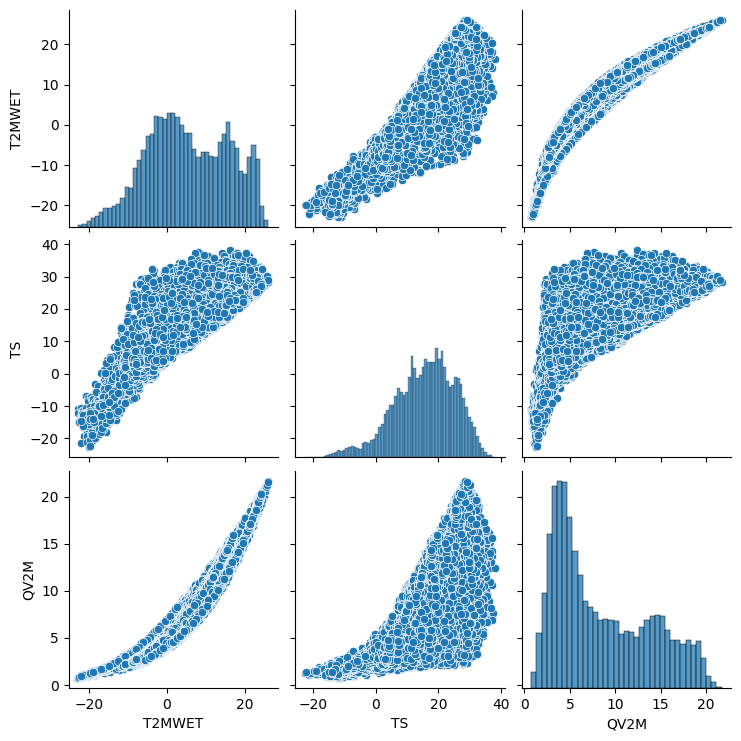

In [63]:
# Passing variables to a list 
variables = ['T2MWET', 'TS', 'QV2M']
# Pair plot
sns.pairplot(df[variables], diag_kind="hist")
plt.show()

### **** THE END ****